In [33]:
from collections import namedtuple
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np

viridis = mpl.colormaps['viridis']

def cmp(a, b):
    return (a > b) - (a < b)

Point = namedtuple('Point', 'x y')

lines = open('./data.txt', 'r').read().splitlines()

rock_walls = []
for line in lines:
    points = line.split(' -> ')
    points = [point.split(',') for point in points]
    points = [Point(int(x), int(y)) for [x, y] in points]
    rock_walls.append(points)

x_vals = [p.x for line in rock_walls for p in line]
y_vals = [p.y for line in rock_walls for p in line]

min_x, max_x = min(x_vals), max(x_vals)
min_y, max_y = min(y_vals), max(y_vals)

width = max_x - min_x + 2
height = max_y

td = lambda r, x, y: r[y+1][x] == 0
tl = lambda r, x, y: r[y + 1][x - 1] == 0
tr = lambda r, x, y: r[y + 1][x + 1] == 0

In [35]:
#### Part 1
p1_rocks = [[0] * width for i in range(max_y + 2)]

def p1_cx(x: int):
    global min_x
    return x - min_x + 1

for wall in rock_walls:
    x, y = wall[0]
    for point in wall:
        dx = cmp(point.x, x)
        dy = cmp(point.y, y)

        while Point(x, y) != point:
            p1_rocks[y][p1_cx(x)] = 1
            x += dx
            y += dy
    p1_rocks[y][p1_cx(x)] = 1

def p1_drop_sand(rocks):
    x, y = p1_cx(500), 0
    
    while y <= max_y:
        if td(rocks, x, y):
            y += 1
        elif tl(rocks, x, y):
            y += 1
            x -= 1
        elif tr(rocks, x, y):
            y += 1
            x += 1
        else:
            rocks[y][x] = 0.5
            break
    return y > max_y

p1_done = False
p1_count = 0
while not p1_done:
    p1_done = p1_drop_sand(p1_rocks)
    if not p1_done:
        p1_count +=1

/var/folders/bh/0dz000gs65q_yp89dy0j46m00000gn/T/ipykernel_74512/3139567551.py:4: MatplotlibDeprecationWarning: For X (67) and Y (160) with flat shading, the expected shape of A is (159, 66). Passing A ((1, 10494)) is deprecated since 3.5 and will become an error two minor releases later.
  p1_ax.pcolormesh(p1_matrix, cmap=viridis, rasterized=True, vmin=0, vmax=1)


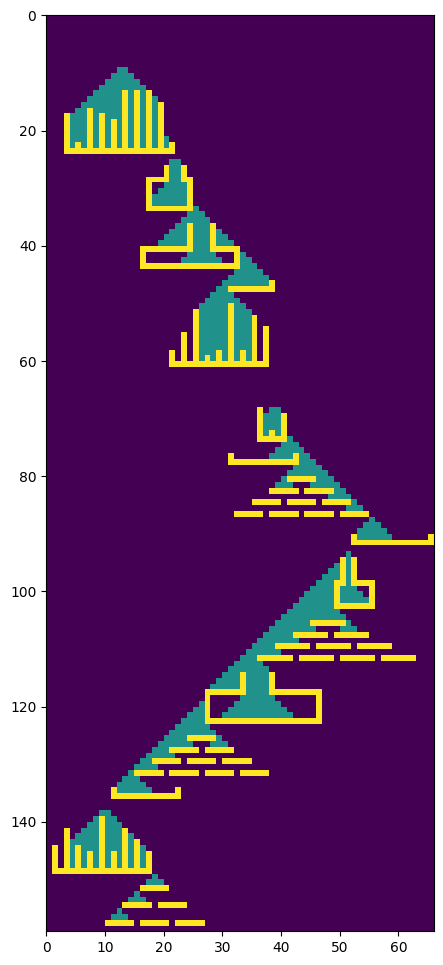

In [39]:
p1_matrix = np.matrix(p1_rocks)

p1_fig, p1_ax = plt.subplots(1, 1, figsize=(5, 5 * (height / width)))
p1_ax.pcolormesh(p1_matrix, cmap=viridis, rasterized=True, vmin=0, vmax=1)
p1_ax.invert_yaxis()

In [40]:
#### Part 2
rocks = [[0] * 400 for i in range(max_y + 2)]
rocks += [[1] * 400]

def cx(x: int):
    global min_x
    return x - 300

for wall in rock_walls:
    x, y = wall[0]
    for point in wall:
        dx = cmp(point.x, x)
        dy = cmp(point.y, y)

        while Point(x, y) != point:
            rocks[y][cx(x)] = 1
            x += dx
            y += dy
    rocks[y][cx(x)] = 1

def drop_sand(rocks):
    x, y = cx(500), 0
    
    while True:
        if td(rocks, x, y):
            y += 1
        elif tl(rocks, x, y):
            y += 1
            x -= 1
        elif tr(rocks, x, y):
            y += 1
            x += 1
        else:
            rocks[y][x] = 0.5
            break
    return x, y

done = False
count = 0
while not done:
    count += 1
    x, y = drop_sand(rocks)
    done = (x, y) == (cx(500), 0)

/var/folders/bh/0dz000gs65q_yp89dy0j46m00000gn/T/ipykernel_74512/4014884189.py:5: MatplotlibDeprecationWarning: For X (401) and Y (161) with flat shading, the expected shape of A is (160, 400). Passing A ((1, 64000)) is deprecated since 3.5 and will become an error two minor releases later.
  psm = ax.pcolormesh(matrix, cmap=viridis, rasterized=True, vmin=0, vmax=1)


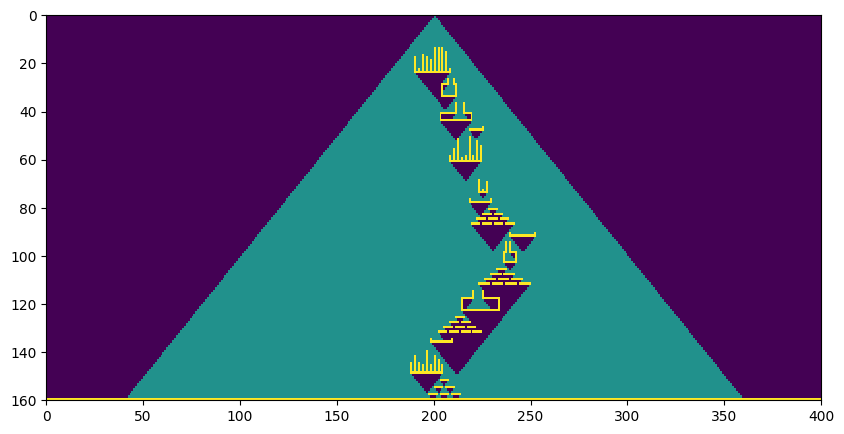

In [41]:
matrix = np.matrix(rocks)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
viridis = mpl.colormaps['viridis']
psm = ax.pcolormesh(matrix, cmap=viridis, rasterized=True, vmin=0, vmax=1)
ax.invert_yaxis()

# fig.colorbar(psm, ax=ax)
